In [1]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt


In [4]:
connection = psycopg2.connect(
    dbname="main",
    user="admin",
    password="admin",
    host="localhost" # or wherever your database is hosted
)
# Create a new cursor object
cursor = connection.cursor()

# Execute the query
cursor.execute("SELECT * FROM candidates")


# Fetch all the records
rows = cursor.fetchall()

# Get the column names from the cursor description
columns = [desc[0] for desc in cursor.description]

df = pd.DataFrame(rows, columns=columns)
# Convert into pandas DataFrame
cursor.close()
connection.close()


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   First Name                 50000 non-null  object
 1   Last Name                  50000 non-null  object
 2   Email                      50000 non-null  object
 3   Application Date           50000 non-null  object
 4   Country                    50000 non-null  object
 5   YOE                        50000 non-null  int64 
 6   Seniority                  50000 non-null  object
 7   Technology                 50000 non-null  object
 8   Code Challenge Score       50000 non-null  int64 
 9   Technical Interview Score  50000 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 3.8+ MB


In [5]:
filtered_df = df[(df['Code Challenge Score'] >= 7) & (df['Technical Interview Score'] >= 7)]
print(filtered_df)

      First Name   Last Name                      Email Application Date  \
2          Larue      Spinka   okey_schultz41@gmail.com       2020-04-14   
4          Larue  Altenwerth  minnie.gislason@gmail.com       2020-05-20   
8           Mose       Lakin   dale_murazik@hotmail.com       2018-03-13   
13         Hilda   Rodriguez   jordan.hyatt@hotmail.com       2020-05-09   
22      Crawford     Ullrich      bruce.koch7@yahoo.com       2021-01-09   
...          ...         ...                        ...              ...   
49935     Walton      Kohler       mitchell85@gmail.com       2018-12-15   
49967      Reyna    Gorczany    barry_hilll39@yahoo.com       2018-01-14   
49978     Danyka        West     susana.ratke@yahoo.com       2021-01-07   
49989     Bryana       Pagac           dante8@yahoo.com       2018-01-16   
49990    Abigale     Weimann           will36@yahoo.com       2018-06-16   

              Country  YOE  Seniority                         Technology  \
2          

In [7]:
import matplotlib.pyplot as plt

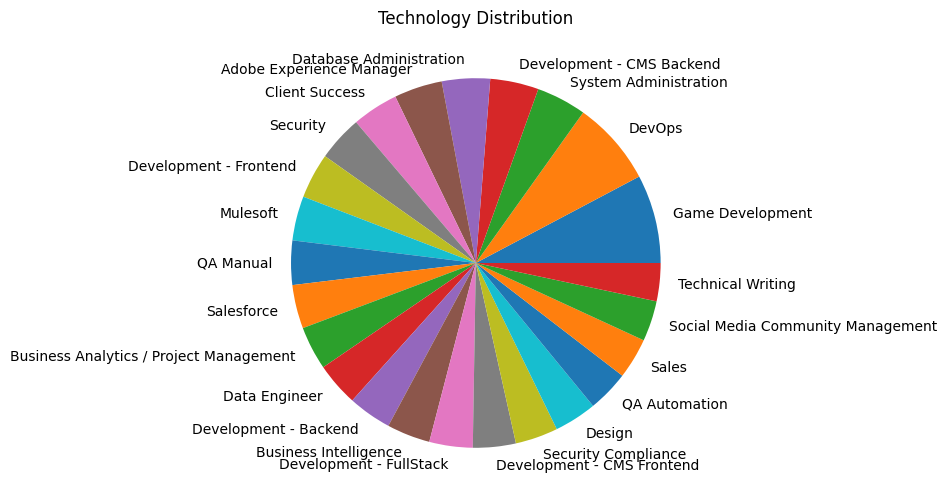

In [11]:
summary = filtered_df['Technology'].value_counts()
# Plot pie chart
plt.figure(figsize=(10,6))
plt.pie(summary, labels = summary.index, startangle=0)
plt.title('Technology Distribution')
plt.show()

In [20]:
filtered_df['Application Date'] = pd.to_datetime(filtered_df['Application Date'])
print(filtered_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6698 entries, 2 to 49990
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   First Name                 6698 non-null   object        
 1   Last Name                  6698 non-null   object        
 2   Email                      6698 non-null   object        
 3   Application Date           6698 non-null   datetime64[ns]
 4   Country                    6698 non-null   object        
 5   YOE                        6698 non-null   int64         
 6   Seniority                  6698 non-null   object        
 7   Technology                 6698 non-null   object        
 8   Code Challenge Score       6698 non-null   int64         
 9   Technical Interview Score  6698 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 575.6+ KB
None


/var/folders/rl/vms135cd0_j0814rxx3vxc4w0000gn/T/ipykernel_23795/1170466882.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Application Date'] = pd.to_datetime(filtered_df['Application Date'])


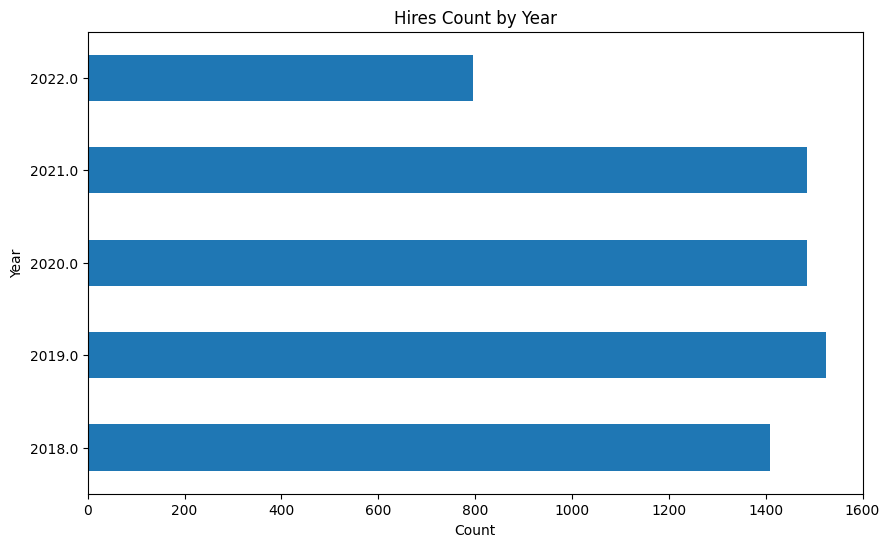

In [23]:
df['Year'] = filtered_df['Application Date'].dt.year

# Group by 'Year' and count the number of 'Technology' 
summary = df.groupby('Year')['Email'].count()

# Plot horizontal bar chart
plt.figure(figsize=(10,6))
summary.plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Year')
plt.title('Hires Count by Year')
plt.show()

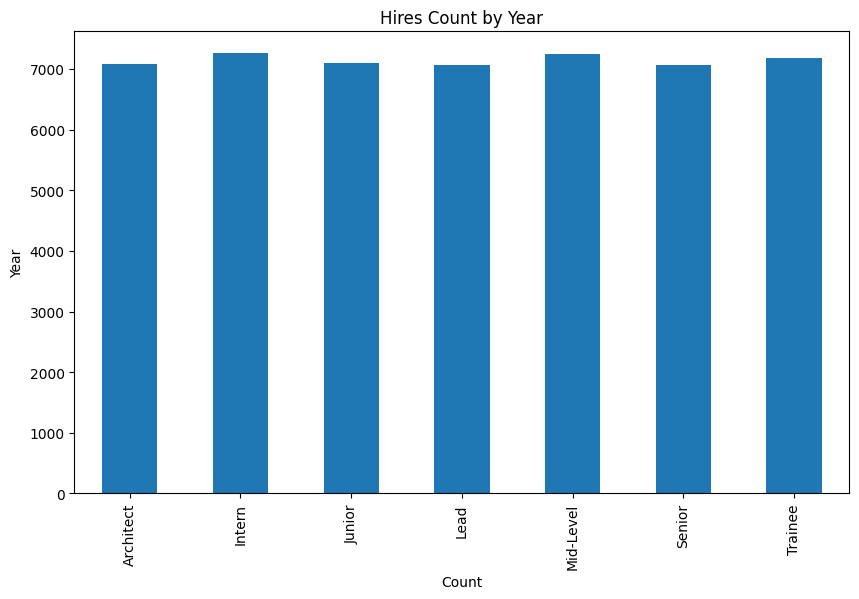

In [25]:

# Group by 'Year' and count the number of 'Technology' 
summary = df.groupby('Seniority')['Email'].count()

# Plot horizontal bar chart
plt.figure(figsize=(10,6))
summary.plot(kind='bar')
plt.xlabel('Count')
plt.ylabel('Year')
plt.title('Hires Count by Year')
plt.show()

/var/folders/rl/vms135cd0_j0814rxx3vxc4w0000gn/T/ipykernel_23795/1050400821.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_country['Year'] = filtered_df['Application Date'].dt.year


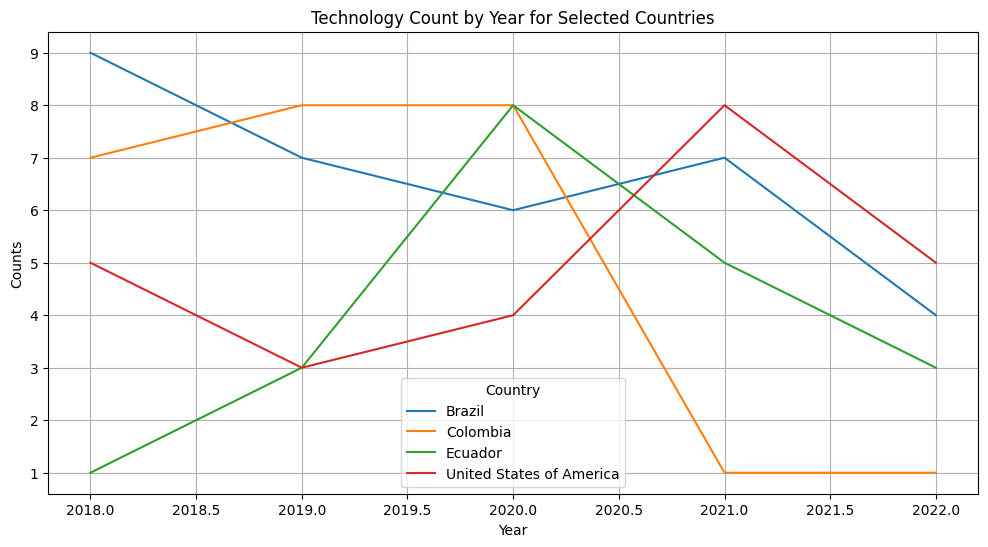

In [29]:
filtered_df_country = filtered_df[filtered_df['Country'].isin(['United States of America', 'Brazil', 'Colombia', 'Ecuador'])]
filtered_df_country['Year'] = filtered_df['Application Date'].dt.year

summary = filtered_df_country.groupby(['Country', 'Year']).size().reset_index(name='Counts')
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.lineplot(x='Year', y='Counts', hue='Country', data=summary)
plt.title('Technology Count by Year for Selected Countries')
plt.grid(True)
plt.show()